In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import zipfile
import os

# Load from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/TESS.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


# Normalisation

Sample rate : 24414
Original audio :


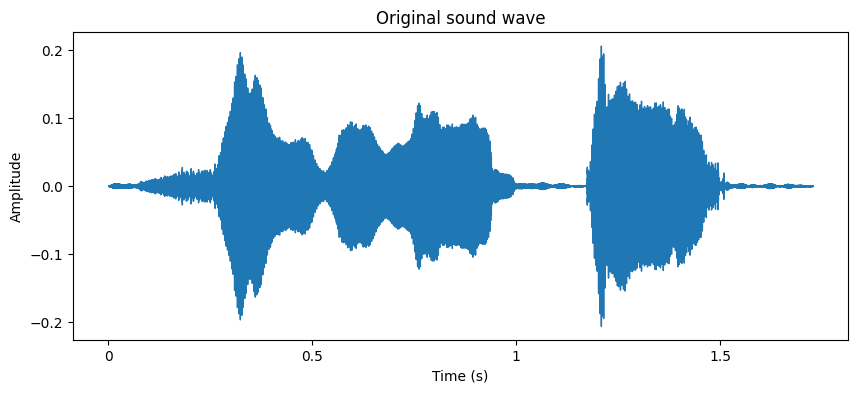

Original sample rate: 24414
Resampled to: 16000
Audio after resampling :


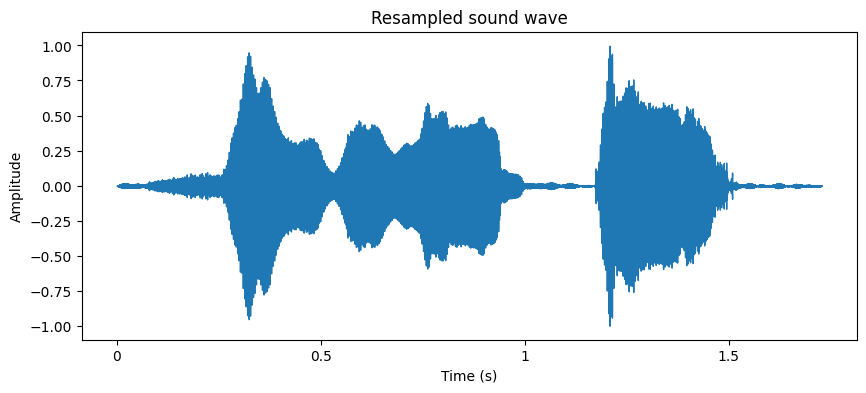

In [8]:
file_path = "/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav"
y, sr = librosa.load(file_path, sr=None)  # Load with native sample rate

print("Sample rate : " + str(sr))

# Play original audio
print("Original audio :")
display(Audio(y, rate=sr))

# Show original sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Normalization based on maximum amplitude
y_normalized = y / np.max(np.abs(y))

# Resampling at 16000 Hz
target_sr = 16000
y_resampled = librosa.resample(y_normalized, orig_sr=sr, target_sr=target_sr)

print(f"Original sample rate: {sr}")
print(f"Resampled to: {target_sr}")

# Play resampled audio
print("Audio after resampling :")
display(Audio(y_resampled, rate=target_sr))

# Show resampled sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title("Resampled sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
# Chemin vers le dataset TESS
dataset_path = '../TESS Toronto emotional speech set data'
output_dir = '../audio_representations_Tess/'

# Créer les dossiers pour les représentations
spectrograms_dir = os.path.join(output_dir, 'spectrograms')
mfcc_dir = os.path.join(output_dir, 'MFCCs')
os.makedirs(spectrograms_dir, exist_ok=True)
os.makedirs(mfcc_dir, exist_ok=True)

# Mapper les émotions TESS vers les codes RAVDESS
emotion_mapping = {
    "angry": "05",
    "disgust": "07",
    "fear": "06",
    "happy": "03",
    "neutral": "01",
    "pleasant_surprise": "08",
    "sad": "04",
}

# Fonction pour générer des spectrogrammes
def generate_spectrogram(y, sr, output_file):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Fonction pour générer des MFCCs
def generate_mfcc(y, sr, output_file, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

# Fonction pour générer un nom de fichier unique
def generate_unique_filename(base_path, base_name, extension):
    counter = 1
    file_path = os.path.join(base_path, f"{base_name}_{counter:03d}.{extension}")
    while os.path.exists(file_path):
        counter += 1
        file_path = os.path.join(base_path, f"{base_name}_{counter:03d}.{extension}")
    return file_path

# Charger et traiter les fichiers audio
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Vérifie si c'est un dossier
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):  # Vérifie si c'est un fichier audio
                file_path = os.path.join(folder_path, file)

                # Charger l'audio
                y, sr = librosa.load(file_path, sr=None)

                # Extraire les informations
                locutrice = folder.split('_')[0]  # OAF ou YAF
                emotion = folder.split('_')[1].lower()  # Emotion en minuscule

                # Récupérer le code RAVDESS pour l'émotion
                emotion_code = emotion_mapping.get(emotion, "00")  # 00 si inconnue

                # Base filename sans conflit
                base_filename = f"02-01-{emotion_code}-01-01-01-01"
                spectrogram_output = generate_unique_filename(spectrograms_dir, base_filename, "png")
                mfcc_output = generate_unique_filename(mfcc_dir, base_filename, "png")

                # Générer et sauvegarder les représentations
                generate_spectrogram(y, sr, spectrogram_output)
                generate_mfcc(y, sr, mfcc_output)

                print(f"Représentations générées pour {file}:")
                print(f"  - Spectrogramme: {spectrogram_output}")
                print(f"  - MFCCs: {mfcc_output}")


Représentations générées pour OAF_five_disgust.wav:
  - Spectrogramme: ../audio_representations_Tess/spectrograms\02-01-07-01-01-01-01_043.png
  - MFCCs: ../audio_representations_Tess/MFCCs\02-01-07-01-01-01-01_043.png
Représentations générées pour OAF_food_disgust.wav:
  - Spectrogramme: ../audio_representations_Tess/spectrograms\02-01-07-01-01-01-01_044.png
  - MFCCs: ../audio_representations_Tess/MFCCs\02-01-07-01-01-01-01_044.png
Représentations générées pour OAF_gap_disgust.wav:
  - Spectrogramme: ../audio_representations_Tess/spectrograms\02-01-07-01-01-01-01_045.png
  - MFCCs: ../audio_representations_Tess/MFCCs\02-01-07-01-01-01-01_045.png
Représentations générées pour OAF_gas_disgust.wav:
  - Spectrogramme: ../audio_representations_Tess/spectrograms\02-01-07-01-01-01-01_046.png
  - MFCCs: ../audio_representations_Tess/MFCCs\02-01-07-01-01-01-01_046.png
Représentations générées pour OAF_gaze_disgust.wav:
  - Spectrogramme: ../audio_representations_Tess/spectrograms\02-01-07-01-

In [ ]:
import os

def rename_files_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Découper le nom du fichier avant l'extension
            base_name, ext = os.path.splitext(filename)


            main_part, last_part = base_name.rsplit("_", 1)  # Diviser au dernier underscore
            parts = main_part.split("-")

            # Vérifier qu'il y a exactement 8 parties
            if len(parts) == 7:
                # Supprimer l'avant-dernière partie et ajouter la dernière partie à la fin
                parts[-2] = parts[-1]  # Remplacer l'avant-dernière section par la dernière
                parts.pop()  # Supprimer l'ancienne dernière section
                # Construire le nouveau nom
                new_name = "-".join(parts) + "-" + last_part + ext
                # Renommer le fichier
                old_path = os.path.join(folder_path, filename)
                new_path = os.path.join(folder_path, new_name)
                os.rename(old_path, new_path)
                print(f"Renommé : {filename} -> {new_name}")
            else:
                print(f"Nom ignoré (structure incorrecte) : {filename}")


# Chemin corrigé avec un raw string
folder_path = "../audio_representations/audio_representations_savee/spectrograms/"
rename_files_in_folder(folder_path)


Renommé : 02-01-00-01-01-01-01_001.png -> 02-01-00-01-01-01-001.png
Renommé : 02-01-00-01-01-01-01_002.png -> 02-01-00-01-01-01-002.png
Renommé : 02-01-00-01-01-01-01_003.png -> 02-01-00-01-01-01-003.png
Renommé : 02-01-00-01-01-01-01_004.png -> 02-01-00-01-01-01-004.png
Renommé : 02-01-00-01-01-01-01_005.png -> 02-01-00-01-01-01-005.png
Renommé : 02-01-00-01-01-01-01_006.png -> 02-01-00-01-01-01-006.png
Renommé : 02-01-00-01-01-01-01_007.png -> 02-01-00-01-01-01-007.png
Renommé : 02-01-00-01-01-01-01_008.png -> 02-01-00-01-01-01-008.png
Renommé : 02-01-00-01-01-01-01_009.png -> 02-01-00-01-01-01-009.png
Renommé : 02-01-00-01-01-01-01_010.png -> 02-01-00-01-01-01-010.png
Renommé : 02-01-00-01-01-01-01_011.png -> 02-01-00-01-01-01-011.png
Renommé : 02-01-00-01-01-01-01_012.png -> 02-01-00-01-01-01-012.png
Renommé : 02-01-00-01-01-01-01_013.png -> 02-01-00-01-01-01-013.png
Renommé : 02-01-00-01-01-01-01_014.png -> 02-01-00-01-01-01-014.png
Renommé : 02-01-00-01-01-01-01_015.png -> 02-01-

In [ ]:

import os

def supprimer_dernier_tiret_dossier(dossier):
    # Lister tous les fichiers dans le dossier
    for nom_fichier in os.listdir(dossier):
        chemin_complet = os.path.join(dossier, nom_fichier)

        # Vérifier que c'est un fichier
        if os.path.isfile(chemin_complet):
            # Trouver le dernier tiret dans le nom du fichier
            dernier_tiret_index = nom_fichier.rfind('-')

            if dernier_tiret_index != -1:
                # Supprimer le dernier tiret
                nouveau_nom = nom_fichier[:dernier_tiret_index] + nom_fichier[dernier_tiret_index + 1:]
                chemin_nouveau_fichier = os.path.join(dossier, nouveau_nom)

                # Renommer le fichier
                os.rename(chemin_complet, chemin_nouveau_fichier)
                print(f"Renommé : {nom_fichier} -> {nouveau_nom}")

# Exemple d'utilisation
dossier = "../audio_representations/audio_representations_Tess/spectrograms/"
supprimer_dernier_tiret_dossier(dossier)


Renommé : 02-01-01-01-01-01-001-.png -> 02-01-01-01-01-01-001.png
Renommé : 02-01-01-01-01-01-002-.png -> 02-01-01-01-01-01-002.png
Renommé : 02-01-01-01-01-01-003-.png -> 02-01-01-01-01-01-003.png
Renommé : 02-01-01-01-01-01-004-.png -> 02-01-01-01-01-01-004.png
Renommé : 02-01-01-01-01-01-005-.png -> 02-01-01-01-01-01-005.png
Renommé : 02-01-01-01-01-01-006-.png -> 02-01-01-01-01-01-006.png
Renommé : 02-01-01-01-01-01-007-.png -> 02-01-01-01-01-01-007.png
Renommé : 02-01-01-01-01-01-008-.png -> 02-01-01-01-01-01-008.png
Renommé : 02-01-01-01-01-01-009-.png -> 02-01-01-01-01-01-009.png
Renommé : 02-01-01-01-01-01-010-.png -> 02-01-01-01-01-01-010.png
Renommé : 02-01-01-01-01-01-011-.png -> 02-01-01-01-01-01-011.png
Renommé : 02-01-01-01-01-01-012-.png -> 02-01-01-01-01-01-012.png
Renommé : 02-01-01-01-01-01-013-.png -> 02-01-01-01-01-01-013.png
Renommé : 02-01-01-01-01-01-014-.png -> 02-01-01-01-01-01-014.png
Renommé : 02-01-01-01-01-01-015-.png -> 02-01-01-01-01-01-015.png
Renommé : 

In [ ]:
def rename_spectrogram_files(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            # Découper le nom du fichier avant l'extension
            base_name, ext = os.path.splitext(filename)

            main_part, last_part = base_name.rsplit("_", 1)  # Diviser au dernier underscore
            parts = main_part.split("-")

            # Vérifier qu'il y a exactement 8 parties
            if len(parts) == 8:
                # Supprimer l'avant-dernière partie
                parts.pop(-2)
                # Construire le nouveau nom
                new_name = "-".join(parts) + "-" + last_part + ext
                # Renommer le fichier
                old_path = os.path.join(folder_path, filename)
                new_path = os.path.join(folder_path, new_name)
                os.rename(old_path, new_path)
                print(f"Renommé : {filename} -> {new_name}")
            else:
                print(f"Nom ignoré (structure incorrecte) : {filename}")

# Chemin vers le dossier des spectrogrammes
spectrograms_folder_path = "../audio_representations/audio_representations_savee/spectrograms/"
rename_spectrogram_files(spectrograms_folder_path)

Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_001.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_002.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_003.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_004.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_005.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_006.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_007.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_008.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_009.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_010.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_011.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_012.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_013.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_014.png
Nom ignoré (structure incorrecte) : 02-01-00-01-01-01-01_015.png
Nom ignoré (structure inc